In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Long Snapper Models

The component jobs of the long snapper are to snap the ball approximately 7-8 yards backward to the punter and then to be one of the first players to go down the field to tackle the returner. Initial linear regressions found no significant effect of long snapper performance on the quality of punt return. Thus, the primary mechanism by which long snappers can affect play is ensuring that the punter receives the ball quickly and cleanly so that the football can be punted before the punt blockers have sufficient time to block the punt. The conclusions from modeling Long Snapper play demonstrate that a quick snap time dominated the quality of snap insofar as predicting the frequency of a broken play—i.e., a blocked punt or a punter being forced to abandon punting altogether. These conclusions should be taken with a grain of salt as although blocked punts do have a higher average mean snap time than any other outcome, it does not appear to be a statistically significant difference. Furthermore, the dataset does not code snap details or time for “Non-special teams result” plays, which are often the worst outcomes, usually due to an inaccurate snap or mishandling by the punter.

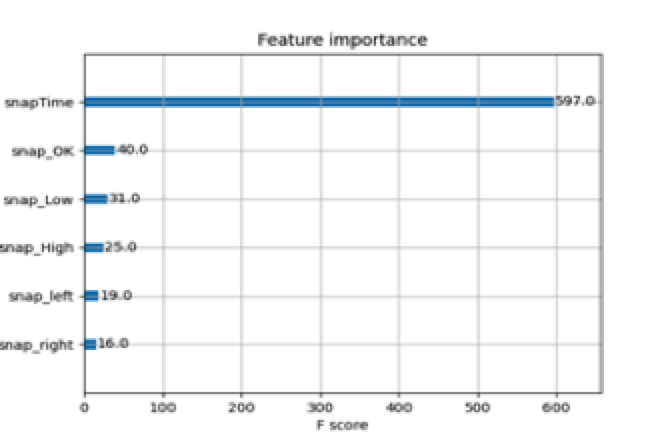
Figure 1: Relative importance of snap time vs. snap quality as determined by XGBoost algorithm

SMOTE was used to generate models for play outcomes based on the quality of the snap and the time taken to execute the snap. Initial attempts to run a Logistic Regression or XGBoost model were unsuccessful due to the highly imbalanced dataset. While prediction success remained low even after rebalancing the dataset, the feature importance remains salient as far as assessing long snapper play. Because snap accuracy largely hovers in the 90-95% range for long snappers, a rough metric for assessing performance is simply dividing average snap time by accuracy, which yielded a top performer of Nick Sundberg, Washington long snapper, across the 2018-2020 seasons. This is somewhat surprising as he does not have many accolades, but many of the next highly ranked long snappers do have accolades, indicating these metrics conform somewhat to consensus opinion around the league. Since long snapper has relatively few metrics available, and those that are available are simple to understand, this outcome is relatively unsurprising.

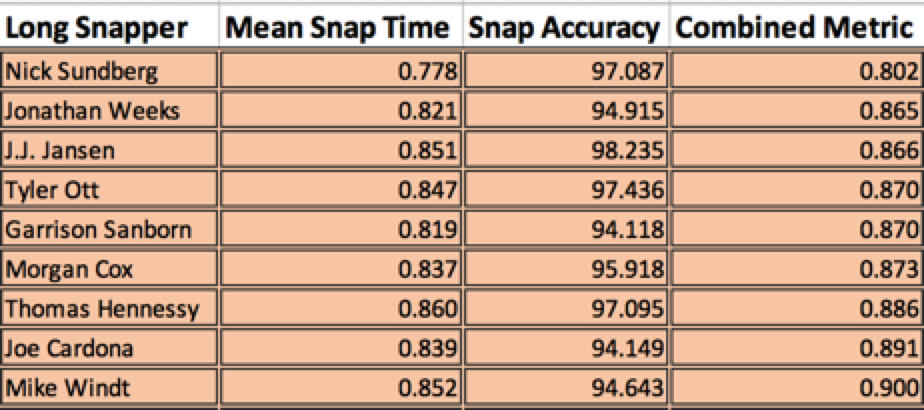
Figure 2: Top Long snappers with mean snap time and snap accuracy combined

# Gunner Models

Assessing the effects that gunners have on punt plays was far more difficult and nuanced than the play of long snappers. The job of a gunner is to get down the field as fast as possible after the ball is snapped and limit the yards gained by the punt returner. Both linear regression and XGBRegressor showed minimal impact by gunners after on yards gained during a punt return—they had similar influence to any other player on the punting team (with the exception of the punter) after the punt was caught. Gunners did have a significant impact, however, on forcing fair catches, which ensures that a returner cannot return the ball. If a returner believes they will not be able to catch the punt cleanly before contact by the punting team or that they will have to lose yards to catch the punt safely, they will call for a fair catch.

The model was trained using only plays that featured two gunners. These plays comprised the vast majority of punt plays, and they proved more successful, on average, than plays without gunners, which tended to occur in very specific circumstances, such as when a team punted from its own end zone and wanted to maximize personnel protecting the punter. The features used for prediction were: each gunner’s distance from the returner, the combined time of the snap, punt, and punt hang time, the length of the kick, seconds since the snap, and the following information for both the gunners and the returners: coordinates, speed, direction of movement, and orientation.

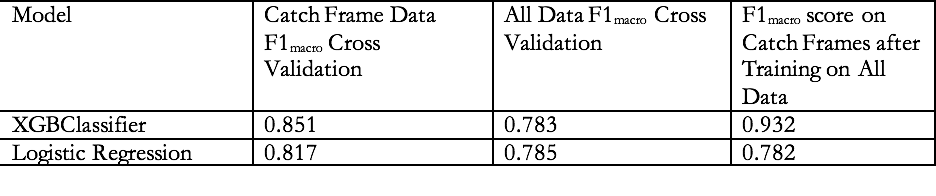
Figure 3: XGBoost vs. Logistic Regression performance on dataset

Initially, we trained a logistic regression model on the data. F1macro was chosen as the metric in order to ensure that the model was successful at predicting values in both classes, even though the dataset is relatively balanced with respect to fair catch and non-fair catch plays. We trained a model first on the frames right before the ball is caught. This yielded an F1macro score of 0.817. A model trained on all frames of data on punt plays yielded 0.785 F1macro score. This small difference is one indicator that a logistic regression was not well suited-to this data, since catch frames should contain much more pertinent information to predict fair catches than the average frame. 

The XGBClassifier ran much faster than Logistic Regression, particularly on the set of all data. While both models were comparable at predicting a fair catch for a random frame when trained on all data, the XGBClassifier was much more successful at predicting fair catches when trained on just catch frames, and it was much more successful at improving on its predictions when given access to all data. By contrast, logistic regression performed worse on the most significant frames after training on all the data.

We were further able to optimize the XGBClassifier through hyperparameter tuning—this increased the final F1macro score from 0.87 to 0.93. The model performed best using a low learning rate (0.03), a large number of estimators (1000), and a max tree depth of 6.

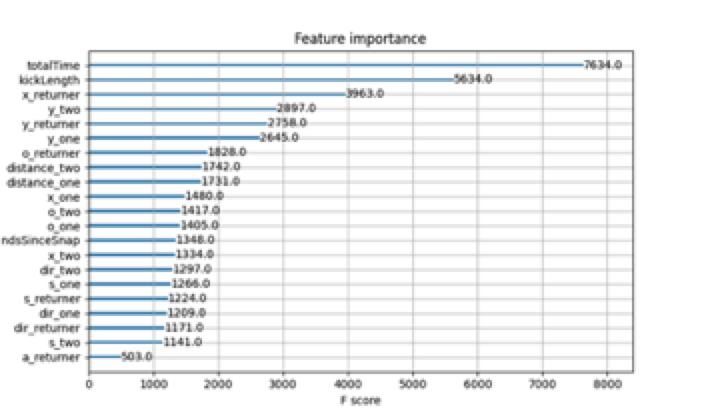
Figure 4: Feature importance in full XGBoost Fair Catch model trained on all data

The feature importance above shows that the most important features for determining the likelihood of a fair catch are the total time from snap to the punt being caught and the length of the punt. For gunners, the most important features are vertical positioning on the field relative to the returner, and distance from the returner.

Full code can be found at https://github.com/sravi4048/nflBigDataBowl/tree/main/Final%20Project